# Preliminaries

![Status](https://img.shields.io/static/v1.svg?label=Status&message=Finished&color=brightgreen)
[![Source](https://img.shields.io/static/v1.svg?label=GitHub&message=Source&color=181717&logo=GitHub)](https://github.com/particle1331/inefficient-networks/blob/master/docs/notebooks/mlops/01-intro)
[![Stars](https://img.shields.io/github/stars/particle1331/inefficient-networks?style=social)](https://github.com/particle1331/inefficient-networks)

```text
𝗔𝘂𝘁𝗵𝗼𝗿: Ron Medina
𝗟𝗮𝘀𝘁 𝗠𝗼𝗱𝗶𝗳𝗶𝗲𝗱: 2022/06/29

𝗗𝗲𝘀𝗰𝗿𝗶𝗽𝘁𝗶𝗼𝗻: 
• Setting up an EC2 instance 
• Creating a ride duration prediction model 
• Introduction to MLOps and maturity models

𝗔𝘁𝘁𝗿𝗶𝗯𝘂𝘁𝗶𝗼𝗻: 
Notes for Module 1 of the MLOps Zoomcamp by DataTalks.Club
• https://datatalks.club/
• https://github.com/DataTalksClub/mlops-zoomcamp/
```

---

## Introduction

In this course, we will talk about best practices and tools for putting machine learning to production. The field for this is called **MLOps**. As an example, we will look at predicting the duration of a taxi ride (e.g. with a ride-hailing app). So what are best practices for putting ML models to production?

To answer that question, we first look at a simplified view of the process for machine learning projects. The first stage is **design**. We think about whether machine learning is the best solution for our problem. If so, we proceed to the next stage which is **train**. Here we train and experiment with different models, and after this stage we have a model which we can use for new data. Finally, we are in the **operate** stage. Suppose that the model is now in production, e.g. in a web service through an API, and then the customer can communicate with this API to provide an approximation of the ride duration given trip data. This process is called deployment. Part of the operate stage, is monitoring whether the model is performing well, or whether it is degrading or becoming worse. 

MLOps include tools and best practices for organizing experiments, and making sure we can reproduce the results of our experiments. This also includes tools and best practices that for retraining and deploying models, e.g. in one click, and monitor the quality of this model in production. This is a brief overview of the field of MLOps, we will talk about it in more detail in the next lessons.

## Environment preparation

In this section we create a server for creating a coding environment. In particular, a Linux machine which contains Docker, Python, and Jupyter. We also want a way to connect to this computer with VS code, and perform port-forwarding, so we can use our local browser to access the remote Jupyter notebook server.

### Renting an EC2 instance

For this section, you will need an [AWS account with an IAM user](https://mlbookcamp.com/article/aws). Go to the EC2 Dashboard and click **Launch Instance**. Fill in the name `mlops-zoomcamp` and choose Ubuntu with 64-bit (x86) architecture:


```{figure} ../../../img/launch-instance-ec2.png
---
width: 45em
---
```

```{figure} ../../../img/launch-instance-ec2-2.png
---
width: 45em
---

```

Next select an instance type. Here a `t2.micro` is shown. But in the course, `t2.xlarge` was used. 

```{figure} ../../../img/launch-instance-ec2-3.png
---
width: 40em
---
```

Choose a name for an RSA type key pair and move it as `.pem` on the `~/.ssh` directory of your local machine. Select the created key pair (not shown here) in the next configuration step.

```{figure} ../../../img/launch-instance-ec2-4.png
---
width: 35em
---
```

Skip the network settings as those look okay. For storage configuration, set the maximum 30 GB storage covered by the free tier. This much storage is needed for Docker images and datasets later in the course. Note that data in EC2 instances persist over reboots. 

```{figure} ../../../img/launch-ec2-storage.png
---
width: 45em
---
```

Confirm the settings and launch the instance. You should get a message saying that the instance has successfully launched. We now proceed to configuring this computer. Copy the instance IP address which we will use when making an SSH connection to it.

```{figure} ../../../img/ec2-instances.png
---
width: 45em
---
```

```{figure} ../../../img/ec2-instances-details.png
---
width: 45em
---
```

### SSH to the EC2 instance

In the terminal of your local machine execute the following two lines of code. The first line [`chmod 400`](https://chmodcommand.com/chmod-400/) means that the permission is set so that the user can read but can't write and execute the key pair file. The next line initiates the connection to the EC2 instance:

```
$ chmod 400 aws-m1.pem
$ ssh -i ~/.ssh/aws-m1.pem ubuntu@34.207.81.38

The authenticity of host '34.207.81.38 (34.207.81.38)' can't be established.
ED25519 key fingerprint is SHA256:YtGvgIhzmVvuu46GL4YnsX9anuYZYU/ZcnD+oI9/qaw.
This key is not known by any other names
Are you sure you want to continue connecting (yes/no/[fingerprint])? yes
Warning: Permanently added '34.207.81.38' (ED25519) to the list of known hosts.
Welcome to Ubuntu 22.04 LTS (GNU/Linux 5.15.0-1004-aws x86_64)

 * Documentation:  https://help.ubuntu.com
 * Management:     https://landscape.canonical.com
 * Support:        https://ubuntu.com/advantage

  System information as of Sun May 22 17:28:46 UTC 2022

  System load:  0.36083984375     Processes:             106
  Usage of /:   5.0% of 28.90GB   Users logged in:       0
  Memory usage: 20%               IPv4 address for eth0: 172.31.24.183
  Swap usage:   0%

0 updates can be applied immediately.


The list of available updates is more than a week old.
To check for new updates run: sudo apt update


The programs included with the Ubuntu system are free software;
the exact distribution terms for each program are described in the
individual files in /usr/share/doc/*/copyright.

Ubuntu comes with ABSOLUTELY NO WARRANTY, to the extent permitted by
applicable law.

To run a command as administrator (user "root"), use "sudo <command>".
See "man sudo_root" for details.

ubuntu@ip-172-31-24-183:~$
```

To make it easier to connect to the remote machine, we can edit the `.ssh/config` file to include:

```
Host mlops-zoomcamp
    HostName 34.207.81.38
    User ubuntu
    IdentityFile ~/.ssh/aws-m1.pem
    StrictHostKeyChecking no
```

Then, we can simply run the following to SSH into our instance using:

```
$ ssh mlops-zoomcamp
```

### Installing Anaconda

There is nothing yet on this machine. First we install `conda`. Go to the [Anaconda downloads page](https://www.anaconda.com/products/distribution#Downloads) and copy the link for the Linux 64-bit (x86) installer. The outputs are skipped for the sake of clarity:

```
wget https://repo.anaconda.com/archive/Anaconda3-2022.05-Linux-x86_64.sh
bash Anaconda3-2022.05-Linux-x86_64.sh
source ~/.bashrc
(base) ubuntu@ip-172-31-24-183:~$
```

The first command will save a bash script which is executed in the next command. This installs Anaconda after agreeing to the terms of use and confirming the install location. Here `(base)` indicates that we are in the base `conda` environment:

```bash
(base) ubuntu@ip-172-31-24-183:~$ which python
/home/ubuntu/anaconda3/bin/python
```

### Installing Docker and Docker Compose

Next we install [Docker](https://www.docker.com/) and [Docker Compose](https://docs.docker.com/compose/). The last two commands allow us to run `docker` without `sudo`. The outputs are skipped for clarity.

```bash
sudo apt update
sudo apt install docker.io
sudo groupadd docker
sudo usermod -aG docker $USER
```

Next create a `soft` directory where we will install Docker Compose. To get the download link for this, we go to the [releases page](https://github.com/docker/compose/releases) of Docker Compose in GitHub. There we will find the release for Linux x86 in the Assets section. Copy the link and perform the following install:

```bash
mkdir soft
cd soft
wget https://github.com/docker/compose/releases/download/v2.5.1/docker-compose-linux-x86_64 -O docker-compose
chmod +x docker-compose
```

Note that `docker-compose` should be highlighted indicating that it is executable after [`chmod +x`](https://linuxtect.com/what-is-chmod-x-command-in-linux/):

```bash
(base) ubuntu@ip-172-31-17-129:~/soft$ ls
docker-compose
```

Next add the `soft` directory to the `PATH`. We can do this with `vim`:

```bash
vi ~/.bashrc
```

where we add a new line `export PATH="${HOME}/soft:${PATH}"` at the end of the file. To apply this change, we run the following command. The last output tells us that `soft` has been added to the path:

```bash
(base) ubuntu@ip-172-31-24-183:~/soft$ source ~/.bashrc
(base) ubuntu@ip-172-31-24-183:~/soft$ cd ..
(base) ubuntu@ip-172-31-24-183:~$ which docker-compose
/home/ubuntu/soft/docker-compose
```

Now test if `docker` has been properly installed:

```bash
(base) ubuntu@ip-172-31-24-183:~$ docker run hello-world

Unable to find image 'hello-world:latest' locally
latest: Pulling from library/hello-world
2db29710123e: Pull complete
Digest: sha256:80f31da1ac7b312ba29d65080fddf797dd76acfb870e677f390d5acba9741b17
Status: Downloaded newer image for hello-world:latest

Hello from Docker!
This message shows that your installation appears to be working correctly.
[...]

**Note:** If you get permission denied, you may have to exit and reconnect to your virtual machine. 

### Port forwarding with VS Code

Now that the coding environments are now setup, we can now put code into our remote computer. For read only access, we can use the HTTPS link to our fork of the [MLOps Zoomcamp code repository](https://github.com/DataTalksClub/mlops-zoomcamp). We use this to clone the repo into our remote instance:

```bash
(base) ubuntu@ip-172-31-24-183:~$ git clone https://github.com/particle1331/mlops-zoomcamp.git

Cloning into 'mlops-zoomcamp'...
remote: Enumerating objects: 351, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 351 (delta 68), reused 66 (delta 56), pack-reused 265
Receiving objects: 100% (351/351), 899.55 KiB | 17.64 MiB/s, done.
Resolving deltas: 100% (173/173), done.
```

We want to get access to the instance with VS code, so we have an IDE to work with. Open a remote window by clicking the icon on lower left of the VS code window. Click "Connect to Host" and select `mlops-zoomcamp`. Note that this requires the [Remote - SSH](https://marketplace.visualstudio.com/items?itemName=ms-vscode-remote.remote-ssh) extension installed.

```{figure} ../../../img/ec2-vs-connected.png
---
width: 45em
---
```

How about Jupyter notebooks? We want to connect to the remote Jupyter server with our local machine (i.e. using our browser). First, let's spin up a Jupyter notebook server in our remote instance:

```bash
(base) ubuntu@ip-172-31-24-183:~/mlops-zoomcamp$ jupyter notebook
[I 18:10:20.555 NotebookApp] Writing notebook server cookie secret to /home/ubuntu/.local/share/jupyter/runtime/notebook_cookie_secret
[I 2022-05-22 18:10:22.403 LabApp] JupyterLab extension loaded from /home/ubuntu/anaconda3/lib/python3.9/site-packages/jupyterlab
[I 2022-05-22 18:10:22.403 LabApp] JupyterLab application directory is /home/ubuntu/anaconda3/share/jupyter/lab
[I 18:10:22.409 NotebookApp] Serving notebooks from local directory: /home/ubuntu/mlops-zoomcamp
[I 18:10:22.409 NotebookApp] Jupyter Notebook 6.4.8 is running at:
[I 18:10:22.409 NotebookApp] http://localhost:8888/?token=db2b40b5ea1c3bc0f27d8838afa0c20debf7f99dd11e0ae7
[I 18:10:22.409 NotebookApp]  or http://127.0.0.1:8888/?token=db2b40b5ea1c3bc0f27d8838afa0c20debf7f99dd11e0ae7
[I 18:10:22.409 NotebookApp] Use Control-C to stop this server and shut down all kernels (twice to skip confirmation).
[W 18:10:22.415 NotebookApp] No web browser found: could not locate runnable browser.
[C 18:10:22.416 NotebookApp]

    To access the notebook, open this file in a browser:
        file:///home/ubuntu/.local/share/jupyter/runtime/nbserver-6118-open.html
    Or copy and paste one of these URLs:
        http://localhost:8888/?token=db2b40b5ea1c3bc0f27d8838afa0c20debf7f99dd11e0ae7
     or http://127.0.0.1:8888/?token=db2b40b5ea1c3bc0f27d8838afa0c20debf7f99dd11e0ae7
```

Obviously, we can't connect to this server from our local machine using these URLs. To connect to this, we need **port forwarding**. We will use VS code which gives an easy way for configuring this. Simply open the terminal in VS code and click the PORTS tab. Here you will see the remote port and its corresponding local address.

```{figure} ../../../img/ec2-vs-ports.png
---
width: 45em
---
```

Since the local address is `8889`, we put the following URL in our browser:

```
http://localhost:8889/?token=db2b40b5ea1c3bc0f27d8838afa0c20debf7f99dd11e0ae7
```

```{figure} ../../../img/ec2-jupyter.png
---
width: 45em
---
```

**Remark.** You can work with Jupyter notebooks inside the remote VS code assuming you have a powerful enough instance such as a `t2.xlarge`. Make sure to install the Python extensions in SSH (not just locally).

## Training a ride duration prediction model


In this section, we train a simple model for predicting ride duration from trip data. The [dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page) that will be used consist of data obtained from taxi trips (both street hail and dispatch) in New York. 

In [1]:
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from pandas.core.common import SettingWithCopyWarning
from matplotlib_inline import backend_inline

import warnings

backend_inline.set_matplotlib_formats('svg')
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

The dataset can be downloaded [here](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page). For precise definitions of these columns, we can check the [data dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf). We will only use three features to model ride duration: pick-up location (`PULocationID`), drop-off location  (`DOLocationID`), and trip distance (`trip_distance`).

In [2]:
# !mkdir data
# !wget https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2021-01.parquet -O data/green_tripdata_2021-01.parquet
# !wget https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2021-02.parquet -O data/green_tripdata_2021-02.parquet

df = pd.read_parquet('./data/green_tripdata_2021-01.parquet')
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,0.5,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,0.5,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,0.5,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,0.5,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,0.0,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00


In [3]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

### Computing ride duration

Since we are interested in duration, we have to subtract drop off datetime with pickup datetime. Duration by the second may be too granular, so we measure ride duration in minutes. Note that pick-up and drop-off datetimes are already of type `datetime64[ns]` so we can do the following operation:

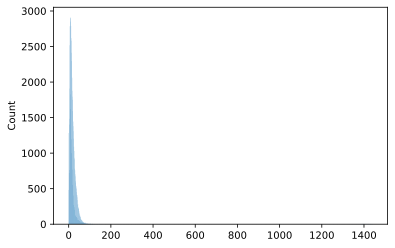

In [4]:
df['duration'] = (df.lpep_dropoff_datetime - df.lpep_pickup_datetime).dt.total_seconds() / 60
sns.histplot(df.duration.values);

It's impossible to see exactly what's happening due to the extremely long tail. So let's take a look at the data directly. Notice the longest trip took 1416 minutes, also there are trips which took 0 minutes, or <1 minute.

In [5]:
df.duration.describe()

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
25%          8.000000
50%         13.883333
75%         23.000000
max       1439.600000
Name: duration, dtype: float64

Let's look at percentiles. We see that 98% of all rides are within 1 hour. From a business perspective, it makes sense to predict durations that are at least one minute, and at most an hour.

In [6]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
50%         13.883333
95%         44.000000
98%         56.000000
99%         67.158167
max       1439.600000
Name: duration, dtype: float64

Checking the fraction of the dataset with duration that fall in this range:

In [7]:
((df.duration >= 1) & (df.duration <= 60)).mean()

0.9658903787344154

In [8]:
df = df[(df.duration >= 1) & (df.duration <= 60)]
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,...,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,...,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,...,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,...,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00,7.083333
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,3.5,...,0.5,0.96,0.0,None,0.3,5.76,1.0,1.0,0.00,2.316667


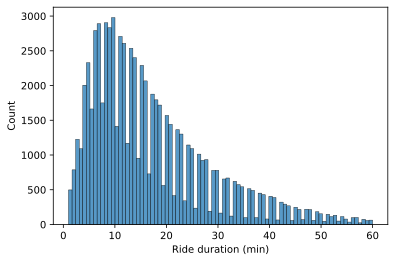

In [9]:
sns.histplot(df.duration.values)
plt.xlabel("Ride duration (min)");

### Feature encoding

Here we select variables that we will use for training the model. For the first iteration of the model, we choose only a few variables. For example, we exclude datetime features which can be relevant. Is it a weekend, or a holiday? From experience, we know that these factors can have a large effect on ride duration. But for a first iteration, we only choose the following three features:

In [10]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

# Convert to string, sklearn requirement
df[categorical] = df[categorical].astype(str)

To encode categorical features, we use [`DictVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html). This simply performs one-hot encoding of categorical features (strings) while the numerical features are simply passed. Consider a dataset with categorical features `f1` with unique values `[a, b, c]` and `f2` with unique values `[d, e]`, and a numerical feature `t`. The transformed dataset gets features `[f1=a, f1=b, f1=c, f2=d, f2=e, t]`. For example, `{f1: a, f2: e, t: 1.3}` is transformed to `[1, 0, 0, 0, 1, 1.3]`. One nice thing about this is that this will not crash with new categories (mapped to zeros).

In [11]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
dv.fit_transform(train_dicts)

<73908x507 sparse matrix of type '<class 'numpy.float64'>'
	with 221724 stored elements in Compressed Sparse Row format>

In [12]:
dv.fit_transform(train_dicts).todense().shape[1] == df.PULocationID.nunique() + df.DOLocationID.nunique() + 1

True

Each trip is represented by a dictionary containing three features:

In [13]:
train_dicts[:5]

[{'PULocationID': '43', 'DOLocationID': '151', 'trip_distance': 1.01},
 {'PULocationID': '166', 'DOLocationID': '239', 'trip_distance': 2.53},
 {'PULocationID': '41', 'DOLocationID': '42', 'trip_distance': 1.12},
 {'PULocationID': '168', 'DOLocationID': '75', 'trip_distance': 1.99},
 {'PULocationID': '75', 'DOLocationID': '75', 'trip_distance': 0.45}]

The location IDs are one-hot encoded and the dataset is converted to a sparse matrix:

In [14]:
dv.transform(train_dicts[:5]).todense()

matrix([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.01],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 2.53],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.12],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.99],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.45]])

### Baseline model

In this section, we will train a linear regression model. Note that the validation set consists of data one month after the training set. We will define a sequence of transformations that will be applied to the dataset to get the model features.

In [15]:
def preprocess_dataset(filename, transforms, categorical, numerical):
    """Return processed features dict and target."""
    
    # Load dataset
    df = pd.read_parquet(filename)

    # Add target column; filter outliers
    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df['duration'] = df.duration.dt.total_seconds() / 60
    df = df[(df.duration >= 1) & (df.duration <= 60)]
    
    # Apply in-between transformations
    df = compose(*transforms[::-1])(df)

    # For dict vectorizer: int = ignored, str = one-hot
    df[categorical] = df[categorical].astype(str)

    # Convert dataframe to feature dictionaries
    feature_dicts = df[categorical + numerical].to_dict(orient='records')
    target = df.duration.values

    return feature_dicts, target


# In-between transformations
transforms = []
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

train_dicts, y_train = preprocess_dataset('./data/green_tripdata_2021-01.parquet', transforms, categorical, numerical)
valid_dicts, y_valid = preprocess_dataset('./data/green_tripdata_2021-02.parquet', transforms, categorical, numerical)

# Fit all possible categories
dv = DictVectorizer()
dv.fit(train_dicts)

X_train = dv.transform(train_dicts)
X_valid = dv.transform(valid_dicts)

Training a linear model:

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

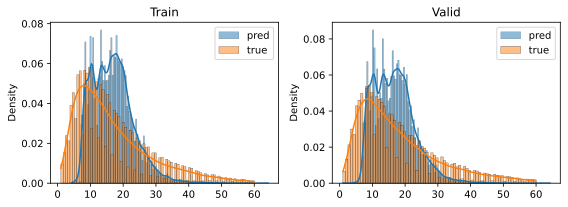

In [17]:
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
sns.histplot(lr.predict(X_train), label='pred', color='C0', stat='density', kde=True)
sns.histplot(y_train, label='true', color='C1', stat='density', kde=True)
plt.title("Train")
plt.legend();

plt.subplot(1, 2, 2)
sns.histplot(lr.predict(X_valid), label='pred', color='C0', stat='density', kde=True)
sns.histplot(y_valid, label='true', color='C1', stat='density', kde=True)
plt.title("Valid")
plt.legend();

plt.tight_layout();

In [18]:
print("RMSE (train):", mean_squared_error(y_train, lr.predict(X_train), squared=False))
print("RMSE (valid):", mean_squared_error(y_valid, lr.predict(X_valid), squared=False))

RMSE (train): 9.775435525372675
RMSE (valid): 10.473886119719918


### Using interaction features

Instead of learning separate weights for the pickup and drop off locations, we can try to consider learning weights for combinations of pickup and drop off locations. (Note we can also add pick up point as additional feature since we know from experience that directionality can be important.)

In [19]:
def add_pickup_dropoff_pair(df):
    """Add product of pickup and dropoff locations."""
    
    df['PU_DO'] = df['PULocationID'].astype(str) + '_' + df['DOLocationID'].astype(str)
    return df


# In-between transformations
transforms = [add_pickup_dropoff_pair]
categorical = ['PU_DO']
numerical = ['trip_distance']

train_dicts, y_train = preprocess_dataset('./data/green_tripdata_2021-01.parquet', transforms, categorical, numerical)
valid_dicts, y_valid = preprocess_dataset('./data/green_tripdata_2021-02.parquet', transforms, categorical, numerical)

# Fit all possible categories
dv = DictVectorizer()
dv.fit(train_dicts)

X_train = dv.transform(train_dicts)
X_valid = dv.transform(valid_dicts)

Using the same model:

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

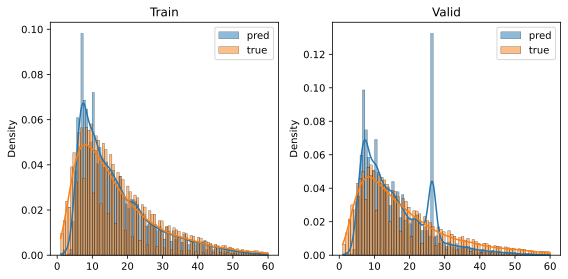

In [21]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(lr.predict(X_train), label='pred', color='C0', stat='density', kde=True)
sns.histplot(y_train, label='true', color='C1', stat='density', kde=True)
plt.title("Train")
plt.legend();

plt.subplot(1, 2, 2)
sns.histplot(lr.predict(X_valid), label='pred', color='C0', stat='density', kde=True)
sns.histplot(y_valid, label='true', color='C1', stat='density', kde=True)
plt.title("Valid")
plt.legend();

plt.tight_layout();

In [22]:
print("RMSE (train):", mean_squared_error(y_train, lr.predict(X_train), squared=False))
print("RMSE (valid):", mean_squared_error(y_valid, lr.predict(X_valid), squared=False))

RMSE (train): 4.640808447371229
RMSE (valid): 7.47957949768635


### Persisting the model

In [23]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

### Experiment tracking

The process of experimenting with different models and features undertaken in this section can be improved with experiment tracking. This makes sure our models and its performance are stored in some registry so that we can reproduce the results we have obtained (not lost with each restart or rerun of notebook cells). This will be discussed in the [Module 2: Experiment tracking and model management](https://github.com/DataTalksClub/mlops-zoomcamp/tree/main/02-experiment-tracking).

## MLOps maturity model

The MLOps maturity model provides a way of measuring the maturity of machine learning production environments as well as provide a guideline for continuous improvement of production systems and workflows.

```{margin}
[MLOps maturity model](https://docs.microsoft.com/en-us/azure/architecture/example-scenario/mlops/mlops-maturity-model)
```
```{figure} ../../../img/mlops-maturity-1.png
---
width: 45.4em
---
```

```{figure} ../../../img/mlops-maturity-2.png
---
width: 45em
---
The MLOps maturity model encompasses five levels of technical capability.
```

<br>